<a href="https://colab.research.google.com/github/LatiefDataVisionary/nlp-emotikon-slang-id/blob/main/notebooks/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Libraries, Install Sastrawi, Install Swifter and Install Emoji**

In [4]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.8 MB/s eta 0:00:00


In [70]:
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=bdeeb00431b9b539dacc5df6f091906d5cb99767ec2bb3fffbf228c44e983469
  Stored in directory: /root/.cache/pip/wheels/ef/7f/bd/9bed48f078f3ee1fa75e0b29b6e0335ce1cb03a38d3443b3a3
Successfully built swifter


In [26]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.6 MB/s eta 0:00:00


In [71]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import emoji
import swifter

## **Download NLTK resources**

In [6]:
nltk.download('punkt') # Tokenizer models
nltk.download('stopwords') # Stopwords for Indonesian and English
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

## **Load the dataset**

In [7]:
url = 'https://raw.githubusercontent.com/LatiefDataVisionary/nlp-emotikon-slang-id/refs/heads/main/data/raw_merged/merged_bucin_tweet.csv'
df = pd.read_csv(url)
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1921236320413687871,Sat May 10 16:10:08 +0000 2025,9190,kdm ️ resident playbook ️ pict atas minta peg...,1921236320413687871,https://pbs.twimg.com/media/GqmaQGPWcAAMaS9.jpg,NaN,in,Rules 👇,452,324,1044,https://x.com/kdrama_menfess/status/1921236320...,1012588105591713793,kdrama_menfess
1,1920994897315733648,Sat May 10 00:10:48 +0000 2025,19038,Jualan tapi julidin customer tu maksudnya gima...,1920994897315733648,https://pbs.twimg.com/media/Gqi-q2RXgAAIW_5.jpg,NaN,in,Indonesia,684,593,1319,https://x.com/Maeliani07/status/19209948973157...,1659026628071288835,Maeliani07
2,1921516689079820765,Sun May 11 10:44:13 +0000 2025,4,Ini pas awal vidio Yeye kaya nyandar di bahu K...,1921516689079820765,https://pbs.twimg.com/media/GqqZOtGaUAAgDdP.jpg,NaN,in,dusun majasri,0,0,1,https://x.com/BeUrCLOUDS/status/19215166890798...,2995021591,BeUrCLOUDS
3,1921414816133996832,Sun May 11 03:59:24 +0000 2025,2128,kdm resident playbook Ini tuh dowon yiyoung p...,1921414816133996832,https://pbs.twimg.com/media/Gqo8l6vW0AAbCWI.jpg,NaN,in,Rules 👇,55,77,198,https://x.com/kdrama_menfess/status/1921414816...,1012588105591713793,kdrama_menfess
4,1921515322135232681,Sun May 11 10:38:47 +0000 2025,438,Bu lena liat kelakuan bucin adiknya AQEELA TER...,1921515322135232681,https://pbs.twimg.com/ext_tw_video_thumb/19215...,NaN,in,NaN,5,1,69,https://x.com/staraquars/status/19215153221352...,1692804014994599937,staraquars
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1921519612543279514,Sun May 11 10:55:50 +0000 2025,12,gue bisa kok bales argumentasi kalian pake kat...,1921519612543279514,NaN,NaN,in,bikini bottom 🫧🪸🫙🐬🧜‍♀️,0,0,0,https://x.com/redhorse44/status/19215196125432...,1642331059634442241,redhorse44
611,1920141611280847139,Wed May 07 15:40:09 +0000 2025,1410,SKSKSKSKSKSKSKSK ternyata gini ya rasanya buc...,1920141611280847139,NaN,NaN,in,Indonesia,27,108,33,https://x.com/tanyarlfes/status/19201416112808...,1371650588,tanyarlfes
612,1921137993051525158,Sat May 10 09:39:25 +0000 2025,274,Mav kalau sensitip tapi kalian anak UT! yang k...,1921137993051525158,NaN,NaN,in,NaN,54,145,13,https://x.com/utfess/status/1921137993051525158,1451424492719251460,utfess
613,1921453647201710170,Sun May 11 06:33:43 +0000 2025,428,mae ning sama gem sama aja ya kalo udah ditany...,1921453647201710170,NaN,NaN,in,𝕜𝕙𝕦𝕟𝕟𝕠𝕠 ☆ 𝕝𝕪𝕜𝕪𝕠𝕦,0,0,80,https://x.com/dycuri/status/1921453647201710170,1794083416058609664,dycuri


## **1. Scenario 1: No Emoticons/Slang**

### **a. Separate the dataset for Scenario 1**

In [8]:
df1_no_emoticons = df

### **b. Apply preprocessing steps**

**1. Clean Text**

In [11]:
def clean_text_scenario1(text):
  """
    Clean text by removing URLs, mentions, hashtags, non-alphabetic characters (including emoticons),
    and Indonesian slang words.

    Args:
        text (str): Raw input text.

    Returns:
        str: Cleaned text with only formal Indonesian/English words.
    """
  if pd.isna(text):  # Handle missing values
    return ''

  # Remove URLs, mentions (@), and hashtags (#)
  text = re.sub(r'http\S+|@\w+|#\w+', '', text)

  # Remove ALL non-alphabetic characters (including emoticons and punctuation)
  text = re.sub(r'[^a-zA-Z\s]', '', text)

  # Remove common Indonesian slang words
  slang_words = ['wkwk', 'bangeet', 'gemess', 'mantul', 'sukab']
  for slang in slang_words:
    text = re.sub(r'\b' + slang + r'\b', '', text)  # \b ensures whole-word matching

  # Normalize whitespace
  text = re.sub(r'\s+', ' ', text).strip()

  return text

In [13]:
df1_no_emoticons['cleaned_text'] = df1_no_emoticons['full_text'].apply(clean_text_scenario1)

**2. Case Folding (convert to lower case)**

In [14]:
df1_no_emoticons['case_folded'] = df1_no_emoticons['cleaned_text'].str.lower()

**3. Tokenization**

In [15]:
df1_no_emoticons['tokens'] = df['case_folded'].apply(nltk.word_tokenize)

### **c. Stopword Removal (Indonesian + English + custom)**

In [17]:
stop_words = set(
    stopwords.words('indonesian') +
    stopwords.words('english') +
    ['dong', 'sih', 'nya', 'lah', 'deh', 'rt']
)

In [18]:
df1_no_emoticons['filtered_tokens'] = df1_no_emoticons['tokens'].apply(
    lambda x: [word for word in x if word not in stop_words]
)

### **d. Drop unused columns (Twitter metadata)**

In [19]:
columns_to_drop = [
    'conversation_id_str', 'id_str', 'image_url', 'in_reply_to_screen_name',
    'location', 'quote_count', 'reply_count', 'tweet_url', 'user_id_str'
]
df1_no_emoticons.drop(columns=columns_to_drop, inplace=True)

### **e. Save to CSV**

In [21]:
df1_no_emoticons.to_csv('preprocessed_scenario1_no_emoticons.csv', index=False)

## **2. Scenario 2: Emoticon-to-Text Conversion**

### **a. Separate the dataset for Scenario 2**

In [72]:
df2_emoticons_to_text = df

### **b. Apply preprocessing pipeline**

**1. Clean and convert emoticons**

In [73]:
def emoticon_to_text(text):
    """
    Convert emoticons to their text descriptions enclosed in square brackets.
    Example: 😡 → [angry face], 🎉 → [party popper].

    Args:
        text (str): Raw input text containing emoticons.

    Returns:
        str: Text with emoticons replaced by descriptive labels.
    """
    return emoji.demojize(text, delimiters=(' [', '] '))  # 😡 → [angry face]

In [74]:
def clean_text_scenario2(text):
    """
    Clean text while preserving converted emoticons (as [description]) and slang.

    Args:
        text (str): Raw input text.

    Returns:
        str: Cleaned text with URLs/mentions removed, emoticons converted, and slang retained.
    """
    if pd.isna(text):
        return ''

    # Step 1: Convert emoticons to text descriptions
    text = emoticon_to_text(text)

    # Step 2: Remove URLs, mentions, and hashtags
    text = re.sub(r'http\S+|@\w+|#\w+', '', text)

    # Step 3: Remove special characters EXCEPT those inside [] (emoticon labels)
    text = re.sub(r'[^\w\s\[\]]', '', text)

    # Step 4: Normalize whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [75]:
df2_emoticons_to_text['cleaned_text'] = df2_emoticons_to_text['full_text'].apply(clean_text_scenario2)

**2. Case Folding**

In [76]:
df2_emoticons_to_text['case_folded'] = df2_emoticons_to_text['cleaned_text'].str.lower()

**3. Tokenization**

In [77]:
df2_emoticons_to_text['tokens'] = df2_emoticons_to_text['case_folded'].apply(nltk.word_tokenize)

### **c. Stopword removal (retain slang and emoticon labels)**


In [78]:
stop_worrds = set(
    stopwords.words('indonesian') +
    stopwords.words('english') +
    ['dong', 'sih', 'nya', 'lah', 'deh', 'rt']
)

df2_emoticons_to_text['filtered_tokens'] = df2_emoticons_to_text['tokens'].apply(
    lambda x: [word for word in x if word not in stop_words]
)

### **d. Stemming (skip words inside [ ] to preserve emoticon labels)**

In [79]:
def stem_with_preservation(tokens):
  """
    Apply stemming while preserving emoticon labels (enclosed in []).

    Args:
        tokens (list): List of tokenized words.

    Returns:
        list: Tokens with stemming applied, except to emoticon labels.
  """
  # Initialize the stemmer object here inside the function
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  return[
      stemmer.stem(word) if not word.startswith('[') else word for word in tokens
  ]

df2_emoticons_to_text['stemmed_tokens'] = df2_emoticons_to_text['filtered_tokens'].swifter.apply(stem_with_preservation)

Pandas Apply:   0%|          | 0/615 [00:00<?, ?it/s]

### **e. Drop unused columns (Twitter metadata)**

In [80]:
columns_to_drop = [
    'conversation_id_str', 'id_str', 'image_url', 'in_reply_to_screen_name',
    'location', 'quote_count', 'reply_count', 'tweet_url', 'user_id_str'
]

# Check which columns in columns_to_drop are actually present in the DataFrame
existing_columns = [col for col in columns_to_drop if col in df2_emoticons_to_text.columns]

# Drop only the existing columns
df2_emoticons_to_text.drop(columns=existing_columns, inplace=True)

### **f. Save preprocessed data for scenario 2**

In [81]:
df2_emoticons_to_text.to_csv('preprocessed_scenario2_emoticons_to_text.csv', index=False)

## **3. Scenario 3: Preserve Emoticons & Slang**

### **a. Separate the dataset for Scenario 3**

In [82]:
df3 = df

### **b. Apply Preprocessing**

**1. Cleaning the text**

In [83]:
def clean_text_scenario3(text):
    """
    Clean text while preserving emoticons, slang, and hashtags (converted to plain words).
    Only removes URLs and mentions (@).

    Args:
        text (str): Raw input text.

    Returns:
        str: Text with URLs/mentions removed, hashtags converted, and emoticons/slang retained.
    """
    if pd.isna(text):
        return ''

    # Remove URLs and mentions (@)
    text = re.sub(r'http\S+|@\w+', '', text)

    # Convert hashtags to plain words (e.g., #GoodDay → GoodDay)
    text = re.sub(r'#(\w+)', r'\1', text)

    # Normalize whitespace (preserve emoticons/slang)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [84]:
df3['cleaned_text'] = df3['full_text'].apply(clean_text_scenario3)

**2. Case Folding**

In [85]:
df3['case_folded'] = df['cleaned_text'].str.lower()

**3. Tokenizing**

In [86]:
def tokenize_with_emoticons(text):
    """
    Tokenize text while separating emoticons/special characters.
    Example: "Hello😡" → ["Hello", "😡"].

    Args:
        text (str): Case-folded text.

    Returns:
        list: Tokenized words and emoticons.
    """
    # Add spaces around non-word characters (emoticons, punctuation)
    text = re.sub(r'(\W)', r' \1 ', text)
    return nltk.word_tokenize(text)

In [87]:
df3['tokens'] = df3['case_folded'].apply(tokenize_with_emoticons)

**4. Stopword Removal**

In [88]:
# Stopword removal (preserve emoticons and common slang)
emoticons_slang = {':)', ':(', '😡', '🎉', 'wkwk', 'bangeet'}
emoticons_slang.update(['💀', 'mantul', 'sukab'])

In [89]:
# Extend as needed
stop_words = set(
    stopwords.words('indonesian') +
    stopwords.words('english') +
    ['dong', 'sih', 'nya', 'lah', 'deh', 'rt'] +
    list(emoticons_slang)
)

df3['filtered_tokens'] = df3['tokens'].apply(
    lambda x: [word for word in x if word not in stop_words or word in emoticons_slang]
)

**5. Stemming (skip emoticons/slang)**


In [90]:
def stem_skip_emoticons(tokens):
  """
    Apply stemming only to alphabetic words (skip emoticons/slang).

    Args:
        tokens (list): Tokenized words/emoticons.

    Returns:
        list: Stemmed tokens with emoticons/slang unchanged.
    """
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  return [
      stemmer.stem(word) if word.isalpha() else word for word in tokens
  ]

df3['stemmed_tokens'] = df3['filtered_tokens'].swifter.apply(stem_skip_emoticons)

Pandas Apply:   0%|          | 0/615 [00:00<?, ?it/s]

### **c. Drop unused columns (same as Scenarios 1/2)**

In [91]:
columns_to_drop = [
    'conversation_id_str', 'id_str', 'image_url', 'in_reply_to_screen_name',
    'location', 'quote_count', 'reply_count', 'tweet_url', 'user_id_str'
]

# Check which columns in columns_to_drop are actually present in the DataFrame
existing_columns = [col for col in columns_to_drop if col in df3.columns]

# Drop only the existing columns
df3.drop(columns=existing_columns, inplace=True)

### **d. Save preprocessed data**

In [92]:
df3.to_csv('preprocessed_scenario3_preserve_emoticons_slang.csv', index=False)

## **Visualization of the comparison of the three scenarios**

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns # for enhanced styling

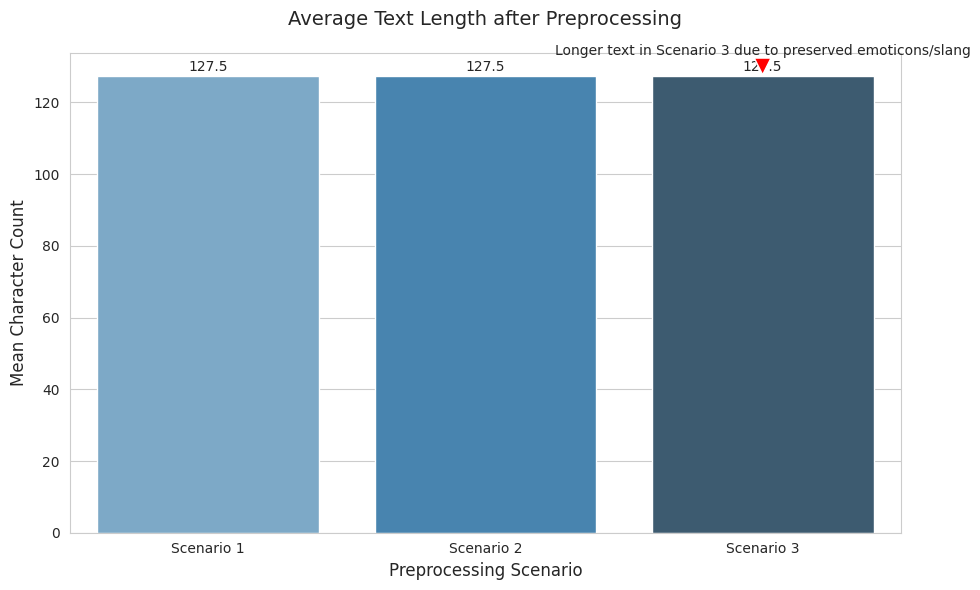

In [97]:
# Calculate mean text length after preprocessing for each scenario
scenarios = ['Scenario 1', 'Scenario 2', 'Scenario 3']
lengths = [
    df1_no_emoticons['cleaned_text'].str.len().mean(), # Formal text (no emoticons/slang)
    df2_emoticons_to_text['cleaned_text'].str.len().mean(), # Emoticons converted to text, added () to call the function
    df3['cleaned_text'].str.len().mean()
]

# Customize plot style
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

# Create bar plot with annotations
ax = sns.barplot(x=scenarios, y=lengths, palette='Blues_d')

# Add title and labels
plt.title('Average Text Length after Preprocessing', fontsize=14, pad=20)
plt.xlabel('Preprocessing Scenario', fontsize=12)
plt.ylabel('Mean Character Count', fontsize=12)

# Add value labels on top of bars
for i, length in enumerate(lengths):
  ax.text(i, length + 0.55, f'{length:.1f}', ha='center', va='bottom', fontsize=10)

# Hightlight key insight (optional)
plt.annotate(
    "Longer text in Scenario 3 due to preserved emoticons/slang",
    xy=(2, lengths[2]), xytext=(2, lengths[2] + 5),
    ha='center', va='bottom', fontsize=10,
    arrowprops=dict(facecolor='red', shrink=0.05)
)

plt.tight_layout()
plt.show()

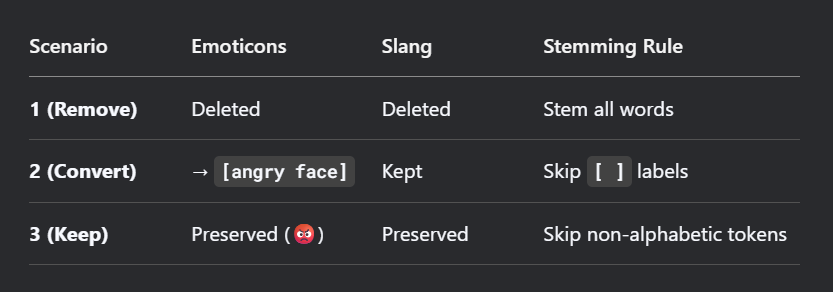